# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных (1 балл)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [26]:
#ваш код 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('Advertising.zip')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [28]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
df.shape

(200, 5)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [5]:
#ваш код 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#ваш код 
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [ ]:
#ваш код 
# 1. Признаки (предикторы)
X = df[['TV', 'radio', 'newspaper']].values  # shape (n, 3)
# 2. Целевая переменная
y = df['sales'].values.reshape(-1, 1)        # shape (n, 1)

## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [58]:
# Добавим единичный столбец в начало X (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # теперь shape (200, 4)

In [59]:
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [ ]:
X_features = X[:, 1:]  # исключаем Intercept
X_mean = X_features.mean(axis=0)
X_std = X_features.std(axis=0)

# Нормализация признаков
X_scaled = (X_features - X_mean) / X_std

# Добавим обратно единичный столбец (Intercept)
X_norm = np.hstack([np.ones((X.shape[0], 1)), X_scaled])


**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [ ]:
num_iters = 1000
m = X_norm.shape[0]
n = X_norm.shape[1]
w = np.zeros((n, 1))
cost_history = []

for i in range(num_iters):
    for k in range(n):
        h = (X_norm[:, :k] @ w[:k]) + (X_norm[:, k+1:] @ w[k+1:])
        numerator = X_norm[:, k].T @ (y - h)
        denominator = X_norm[:, k].T @ X_norm[:, k]
        w[k] = numerator / denominator  # <-- fix here

    cost = ((X_norm @ w - y) ** 2).mean()
    cost_history.append(cost)

feature_names = ['Intercept', 'TV', 'radio', 'newspaper']

# Создание таблицы коэффициентов
weights_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': w.flatten()
})
print("Финальные веса модели:\n",weights_df)
print("\nФинальное значение функции потерь:", cost) 

Финальные веса модели:
      Признак  Коэффициент
0  Intercept    14.022500
1         TV     3.919254
2      radio     2.792063
3  newspaper    -0.022539

Финальное значение функции потерь: 2.784126314510936


Вывод:
Intercept (свободный коэффициент) = 14.02
Это ожидаемое значение продаж, если затраты на рекламу равны нулю. То есть, даже без рекламы, модель предсказывает в среднем 14.02 единиц продаж. Это может отражать: естественный спрос, силу бренда, повторные покупки и т.д.

* TV = 3.92 Если увеличить затраты на рекламу по телевидению на 1 единицу, то продажи увеличатся примерно на 3.92 единицы, при прочих равных.

*  radio = 2.79 Если увеличить расходы на радио-рекламу на 1 единицу, то продажи вырастут примерно на 2.79 единицы.

*  newspaper = -0.02 Если увеличить расходы на рекламу в газетах на 1 единицу, то продажи уменьшаются на 0.02.
Хотя это значение очень близко к нулю, оно указывает, что газетная реклама: либо неэффективна, либо даже может мешать (например, если она плохо таргетирована), либо просто не оказывает значимого влияния в условиях других переменных.

* MSE=2.78 Это значит, что в среднем ошибка прогноза составляет примерно ±1.67 (√2.78) единицы продаж. Это довольно неплохая точность на реальных данных.

Наиболее эффективный канал рекламы — TV.

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [ ]:
from sklearn.linear_model import LinearRegression
lr_stat = LinearRegression(fit_intercept=False)
lr_stat.fit(X_norm, y)

feature_names = ['Intercept', 'TV', 'radio', 'newspaper']
# Получаем коэффициенты из модели и превращаем их в одномерный массив
coef = lr_stat.coef_.flatten()
# Создаем таблицу
weights_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coef
})

print(weights_df)

     Признак  Коэффициент
0  Intercept    14.022500
1         TV     3.919254
2      radio     2.792063
3  newspaper    -0.022539


Если вы все сделали верно, они должны практически совпасть!

Вывод:

результате оба одинаковые

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [ ]:
X = df[['TV', 'radio', 'newspaper']].values  # Преобразуем в массив NumPy

# Вычисляем среднее и стандартное отклонение
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

# Нормализуем: Z = (X - mean) / std
X_scaled = (X - X_mean) / X_std

**Добавим единичный столбец**

In [70]:
intercept = np.ones((X_scaled.shape[0], 1))  # столбец из единиц (размер m x 1)
X_with_intercept = np.hstack([intercept, X_scaled])  # объединяем по горизонтали

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [71]:
def mse_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

w_opt = np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

# Предсказание
y_pred = X_with_intercept @ w_opt

# MSE
mse = mse_error(y, y_pred)
print("MSE:", mse)

MSE: 2.784126314510936


Вывод:

Это означает, что в среднем, квадрат отклонения предсказаний от настоящих значений продаж составляет 2.78. Корень из MSE (RMSE) ≈ √2.78 ≈ 1.67 — в тех же единицах, что sales (возможно, тысяч долларов)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

In [72]:
# 1. Среднее значение по y
y_mean = np.mean(y)

# 2. Наивный прогноз: предсказания = среднее значение
y_naive_pred = np.full_like(y, fill_value=y_mean)

# 3. MSE
mse_naive = mse_error(y, y_naive_pred)

print("MSE наивного прогноза:", mse_naive)
print("Среднее значение продаж (наивный прогноз):", y_mean)

MSE наивного прогноза: 27.085743750000002
Среднее значение продаж (наивный прогноз): 14.0225


Вывод:

MSE наивного прогноза показывает, насколько данные отклоняются от своего среднего. А Среднее значение продаж (наивный прогноз): 14.0225

Линейная регрессионная модель, обученная на нормализованных признаках с учётом свободного члена (интерсепта), показывает значительно лучшую точность, чем наивный прогноз.

* Среднеквадратичная ошибка (MSE) модели: 2.78

* MSE наивного прогноза (среднее значение продаж): 27.09

Это означает, что:

* Линейная модель объясняет большую часть вариации в данных.

* Признаки (TV, radio, newspaper) действительно влияют на продажи.

* Наивная модель, предсказывающая просто среднее, в 10 раз хуже, чем обученная модель.

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [73]:
#ваш код
def lin_pred(X, w):
    return X @ w

# Предсказания на обученной модели
y_pred = lin_pred(X_with_intercept, w_opt)

# MSE
mse = mse_error(y, y_pred)
print("MSE:", mse)

MSE: 2.784126314510936


In [74]:
print("Прогнозы модели:\n", y_pred[:5])

Прогнозы модели:
 [[20.52397441]
 [12.33785482]
 [12.30767078]
 [17.59782951]
 [13.18867186]]


Вывод:

MSE = 2.78 Это подтверждает, что модель работает правильно, и функция lin_pred корректно реализована. Модель линейной регрессии, обученная на нормализованных признаках (TV, radio, newspaper), предсказывает продажи с высокой точностью.

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [75]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    l = X.shape[0]  # общее число объектов
    x_i = X[train_ind].reshape(1, -1)  # строка X в виде вектора-строки
    y_i = y[train_ind]                 # соответствующее значение y
    y_pred_i = x_i @ w_opt                 # предсказание модели

    # Направление изменения
    direction = (2 / l) * (y_pred_i - y_i) * x_i.T

    # Обновлённые веса
    w_new = w_opt - eta * direction

    return w_new

eta = 0.01
train_ind = 5  # обновляем по 6-му объекту
w_new = stoch_grad_step(X_with_intercept, y, w, train_ind, eta)
print("Финальные веса модели:\n", w_new)
y_pred = X_with_intercept @ w_opt  # или lin_pred(X_scaler, w)
print("Первые 5 предсказаний:\n", y_pred[:5])

Финальные веса модели:
 [[14.02197217]
 [ 3.92010632]
 [ 2.79114904]
 [-0.02361852]]
Первые 5 предсказаний:
 [[20.52397441]
 [12.33785482]
 [12.30767078]
 [17.59782951]
 [13.18867186]]


In [76]:


result_df = pd.DataFrame({
    "Факт": y[:5].flatten(),
    "Прогноз": y_pred[:5].flatten()
})
print(result_df)


   Факт    Прогноз
0  22.1  20.523974
1  10.4  12.337855
2   9.3  12.307671
3  18.5  17.597830
4  12.9  13.188672


Вывод:

* Модель достаточно хорошо приближается к фактическим значениям.

* Самое большое отклонение — около 3 единиц, что нормально для реальных данных.

* Ошибки не систематические — они бывают как положительные, так и отрицательные. Это хороший признак.

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [77]:
# ваш код
def cost_function(X, y, par):
    n = X.shape[0]
    y_pred = X @ par
    error = (y_pred - y) ** 2
    cost = (1 / n) * np.sum(error)
    return cost

def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):
    w = w_init.copy()                  # начальные веса
    errors = []                        # список ошибок
    distance = float('inf')           # инициализируем расстояние бесконечностью
    iterations = 0                    # счетчик итераций

    while distance > tol and iterations < max_iter:
        train_ind = np.random.randint(0, X.shape[0])  # случайный индекс строки
        y_pred = X @ w
        mse = cost_function(X, y, w)                  # считаем MSE
        errors.append(mse)

        w_new = stoch_grad_step(X, y, w, train_ind, eta)  # шаг SGD

        distance = np.linalg.norm(w_new - w)         # евклидово расстояние
        w = w_new
        iterations += 1

    return w, errors
w_init = np.zeros((X_with_intercept.shape[1], 1)) 
eta = 0.01
max_iter = 10000
tol = 1e-6

w_sgd, errors = stochastic_gradient_descent(X_with_intercept, y, w_init, eta, max_iter, tol)

**Постройте график зависимости ошибки от номера итерации**

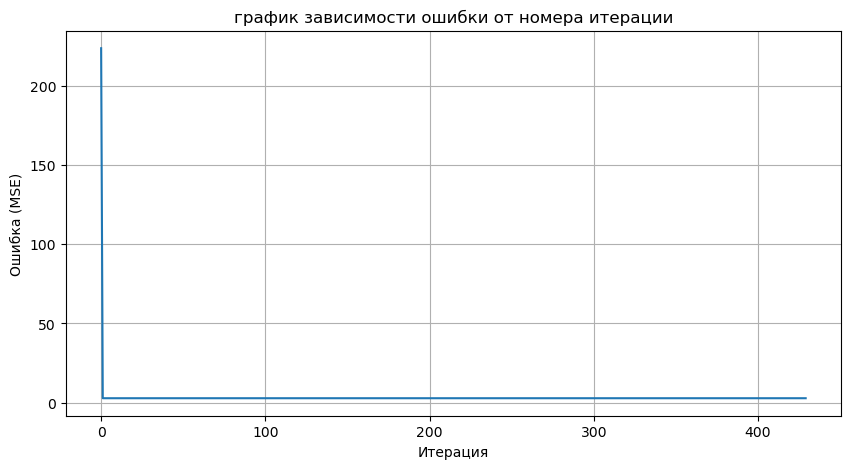

In [78]:
# ваш код
plt.figure(figsize=(10, 5))
plt.plot(errors)
plt.xlabel("Итерация")
plt.ylabel("Ошибка (MSE)")
plt.title("график зависимости ошибки от номера итерации")
plt.grid(True)
plt.show()


**Выведите вектор весов, к которому сошелся метод.**

In [79]:
# ваш код
print("Финальный вектор весов:\n", w_sgd)

Финальный вектор весов:
 [[14.02267127]
 [ 3.91898578]
 [ 2.79179832]
 [-0.02257767]]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [80]:
# ваш код
print("MSE на последней итерации:", errors[-1])


MSE на последней итерации: 2.784126503313544


Вывод:

Модель линейной регрессии, обученная с помощью стоахастического градиентного спуска, значительно снизила ошибку прогноза. Это говорит о том, что затраты на рекламу действительно хорошо объясняют продажи, особенно через каналы TV и radio.

